<a href="https://colab.research.google.com/github/ShaikMohammadUsman/Machine-Learning/blob/master/Flower_recognition_using_pytorch_with_eff_net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
! pip install efficientnet-pytorch


  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.6.3-cp36-none-any.whl size=12422 sha256=5ad7f322f2f6435f889f2d982ffbb1851645e204580d6d2f2bc34d8aad3739ba
  Stored in directory: /root/.cache/pip/wheels/42/1e/a9/2a578ba9ad04e776e80bf0f70d8a7f4c29ec0718b92d8f6ccd
Successfully built efficientnet-pytorch


In [0]:
# Importing the libraries
from fastai.vision import *
from efficientnet_pytorch import EfficientNet
import os

In [0]:
path=Path('/content/drive/My Drive/flowers')
path.ls()

In [15]:
path.ls()

# Create the data using fastai's Datablock API
src = (ImageList.from_folder(path)
                .split_by_rand_pct(0.2, seed=42)
                .label_from_folder()
                .transform(get_transforms(), size=300))

data = src.databunch(bs=8).normalize(imagenet_stats)

[PosixPath('/content/drive/My Drive/flowers/flowers'),
 PosixPath('/content/drive/My Drive/flowers/sunflower'),
 PosixPath('/content/drive/My Drive/flowers/tulip'),
 PosixPath('/content/drive/My Drive/flowers/rose'),
 PosixPath('/content/drive/My Drive/flowers/daisy'),
 PosixPath('/content/drive/My Drive/flowers/dandelion')]

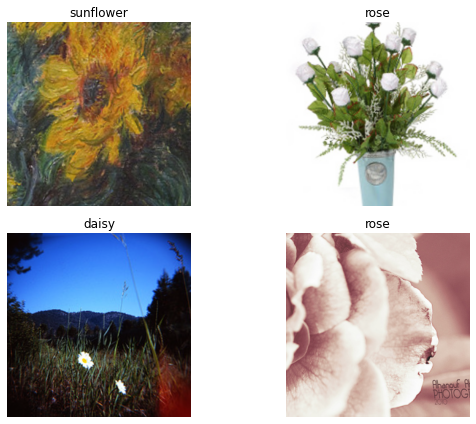

In [17]:
# Let's see some training examples
data.show_batch(rows=2, figsize=(9, 6))

In [18]:
# Replace the fully connected layer at the end to fit our task
# Pre-trained model based on adversarial training
arch = EfficientNet.from_pretrained("efficientnet-b3", advprop=True)
arch._fc = nn.Linear(1536, data.c)

Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/adv-efficientnet-b3-cdd7c0f4.pth" to /root/.cache/torch/checkpoints/adv-efficientnet-b3-cdd7c0f4.pth



Loaded pretrained weights for efficientnet-b3


In [0]:
# Define custom loss function
loss_func = LabelSmoothingCrossEntropy()

In [0]:
learn = Learner(data, arch, loss_func=loss_func, metrics=accuracy, model_dir='/content/drive/My Drive/flow_learner')

In [21]:
# Train the model using 1 Cycle policy
learn.fit_one_cycle(3, slice(1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.858360,0.938002,0.788317,2:34:15
1,0.616389,0.608563,0.921342,2:26:01
2,0.517083,0.494561,0.956622,2:25:13


In [0]:
learn.show_results(rows=2, figsize=(9, 6))